참고: https://www.deeplearningwizard.com/deep_learning/practical_pytorch/pytorch_feedforward_neuralnetwork/



# Feedforward Neural Network with PyTorch
## About Feedforward Neural Network

### Logistic Regression Transition to Neural Networks
#### Logistic Regression Review

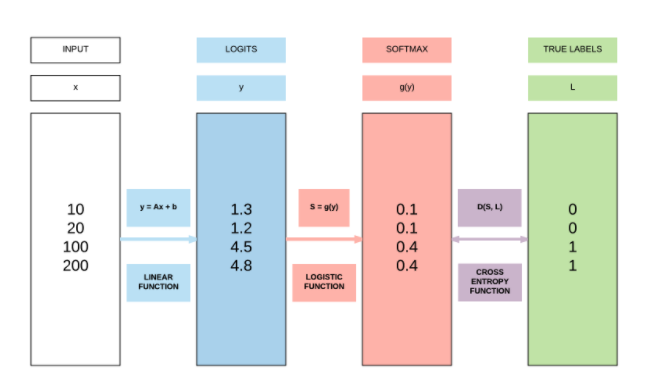

In [1]:
import torch
import torch.nn as nn

In [2]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        out = self.linear(x)
        return out

In [3]:
input_dim = 28*28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)

In [5]:
print(model)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)


#### Logistic Regression Problems
- Can represent **linear** functions well
    - $ y = 2x + 3$
    - $ y = x_1 + x_2 $
    - $ y = x_1 + 3x_2 + 4x_3 $
- Cannot represent **non-linear** functions
    - $ y = 4x_1 + 2x_2^2 +3x_3^3 $
    - $ y = x_1x_2$
       
### Introducing a Non-linear Function

### Non-linear Function In-Depth
- Function: takes a number & perform mathematical operation
- Common Types of Non-linearity
    - ReLUs (Rectified Linear Units)      
    - Sigmoid     
    - Tanh

#### Sigmoid (Logistic)
- $\sigma(x) = \frac{1}{1 + e^{-x}}$
- Input number $\rightarrow$ [0, 1]
    - Large negative number $\rightarrow$ 0
    - Large positive number $\rightarrow$ 1
- Cons: 
    1. Activation saturates at 0 or 1 with **gradients $\approx$ 0**
        - No signal to update weights $\rightarrow$ **cannot learn**
        - Solution: Have to carefully initialize weights to prevent this
    2. Outputs not centered around 0 
        - If output always positive $\rightarrow$ gradients always positive or negative $\rightarrow$ **bad for gradient updates** 

#### Tanh
- $\tanh(x) = 2 \sigma(2x) -1$
    - A scaled sigmoid function
- Input number $\rightarrow$ [-1, 1]
- Cons: 
    1. Activation saturates at 0 or 1 with **gradients $\approx$ 0**
        - No signal to update weights $\rightarrow$ **cannot learn**
        - **Solution**: Have to carefully initialize weights to prevent this

 
#### ReLUs
- $f(x) = \max(0, x)$
- Pros:
    1. Accelerates convergence $\rightarrow$ **train faster**
    2. **Less computationally expensive operation** compared to Sigmoid/Tanh exponentials
- Cons:
    1. Many ReLU units "die" $\rightarrow$ **gradients = 0** forever
        - **Solution**: careful learning rate choice
      


## 2. Building a Feedforward Neural Network with PyTorch

### Model A: 1 Hidden Layer Feedforward Neural Network (Sigmoid Activation)

### Steps
- Step 1: Load Dataset
- Step 2: Make Dataset Iterable
- Step 3: Create Model Class
- Step 4: Instantiate Model Class
- Step 5: Instantiate Loss Class
- Step 6: Instantiate Optimizer Class
- Step 7: Train Model

### Step 1: Loading MNIST Train Dataset
**Images from 1 to 9**

In [6]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [7]:
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...

Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


### Step 2: Make Dataset Iterable

In [8]:
60000 / 100

600.0

In [9]:
6000 / 600

10.0

In [10]:
batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

### Step 3: Create Model Class

In [12]:
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity
        self.sigmoid = nn.Sigmoid()
        # Linear function (readout)
        self.fc2 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
        # Linear function  # LINEAR
        out = self.fc1(x)
        # Non-linearity  # NON-LINEAR
        out = self.sigmoid(out)
        # Linear function (readout)  # LINEAR
        out = self.fc2(out)
        return out

### Step 4: Instantiate Model Class
- **Input** dimension: **784** 
    - Size of image
    - $28 \times 28 = 784$
- **Output** dimension: **10**
    - 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
- **Hidden** dimension: **100**
    - Can be any number
    - Similar term
        - Number of neurons
        - Number of non-linear activation functions

In [13]:
input_dim = 28*28
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

### Step 5: Instantiate Loss Class
- Feedforward Neural Network: **Cross Entropy Loss**
    - _Logistic Regression_: **Cross Entropy Loss**
    - _Linear Regression_: **MSE**
   

In [14]:
criterion = nn.CrossEntropyLoss()

### Step 6: Instantiate Optimizer Class
- Simplified equation
    - $\theta = \theta - \eta \cdot \nabla_\theta $
        - $\theta$: parameters (our tensors with gradient accumulation capabilities)
        - $\eta$: learning rate (how fast we want to learn)
        - $\nabla_\theta$: parameters' gradients
- Even simplier equation
    - `parameters = parameters - learning_rate * parameters_gradients`
    - **At every iteration, we update our model's parameters**

In [15]:
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

### Parameters In-Depth

In [16]:
print(model.parameters())

print(len(list(model.parameters())))

# FC 1 Parameters 
print(list(model.parameters())[0].size())

# FC 1 Bias Parameters
print(list(model.parameters())[1].size())

# FC 2 Parameters
print(list(model.parameters())[2].size())

# FC 2 Bias Parameters
print(list(model.parameters())[3].size())

<generator object Module.parameters at 0x7f82e3c65eb8>
4
torch.Size([100, 784])
torch.Size([100])
torch.Size([10, 100])
torch.Size([10])


### Step 7: Train Model
- Process 
    1. Convert inputs to tensors with gradient accumulation capabilities
    2. Clear gradient buffers
    3. Get output given inputs 
    4. Get loss
    5. Get gradients w.r.t. parameters
    6. Update parameters using gradients
        - `parameters = parameters - learning_rate * parameters_gradients`
    7. REPEAT

In [18]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images with gradient accumulation capabilities
        images = images.view(-1, 28*28).requires_grad_()
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images with gradient accumulation capabilities
                images = images.view(-1, 28*28).requires_grad_()
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct // total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.36865314841270447. Accuracy: 89
Iteration: 1000. Loss: 0.32536983489990234. Accuracy: 90
Iteration: 1500. Loss: 0.3034665584564209. Accuracy: 90
Iteration: 2000. Loss: 0.35374191403388977. Accuracy: 91
Iteration: 2500. Loss: 0.27887123823165894. Accuracy: 91
Iteration: 3000. Loss: 0.46904057264328003. Accuracy: 92


### Model B: 1 Hidden Layer Feedforward Neural Network (Tanh Activation)

### Steps
- Step 1: Load Dataset
- Step 2: Make Dataset Iterable
- **Step 3: Create Model Class**
- Step 4: Instantiate Model Class
- Step 5: Instantiate Loss Class
- Step 6: Instantiate Optimizer Class
- Step 7: Train Model

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

'''
STEP 1: LOADING DATASET
'''

train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

'''
STEP 3: CREATE MODEL CLASS
'''
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity
        self.tanh = nn.Tanh()
        # Linear function (readout)
        self.fc2 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
        # Linear function
        out = self.fc1(x)
        # Non-linearity
        out = self.tanh(out)
        # Linear function (readout)
        out = self.fc2(out)
        return out
'''
STEP 4: INSTANTIATE MODEL CLASS
'''
input_dim = 28*28
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()

'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 7: TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images with gradient accumulation capabilities
        images = images.view(-1, 28*28).requires_grad_()
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images with gradient accumulation capabilities
                images = images.view(-1, 28*28).requires_grad_()
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.4286191463470459. Accuracy: 91
Iteration: 1000. Loss: 0.28052976727485657. Accuracy: 92
Iteration: 1500. Loss: 0.23161044716835022. Accuracy: 93
Iteration: 2000. Loss: 0.3097829520702362. Accuracy: 94
Iteration: 2500. Loss: 0.1654028296470642. Accuracy: 94
Iteration: 3000. Loss: 0.1302552968263626. Accuracy: 95


### Model C: 1 Hidden Layer Feedforward Neural Network (ReLU Activation)

### Steps
- Step 1: Load Dataset
- Step 2: Make Dataset Iterable
- **Step 3: Create Model Class**
- Step 4: Instantiate Model Class
- Step 5: Instantiate Loss Class
- Step 6: Instantiate Optimizer Class
- Step 7: Train Model

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

'''
STEP 1: LOADING DATASET
'''

train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

'''
STEP 3: CREATE MODEL CLASS
'''
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity
        self.relu = nn.ReLU()
        # Linear function (readout)
        self.fc2 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
        # Linear function
        out = self.fc1(x)
        # Non-linearity
        out = self.relu(out)
        # Linear function (readout)
        out = self.fc2(out)
        return out
'''
STEP 4: INSTANTIATE MODEL CLASS
'''
input_dim = 28*28
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()


'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 7: TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images with gradient accumulation capabilities
        images = images.view(-1, 28*28).requires_grad_()
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images with gradient accumulation capabilities
                images = images.view(-1, 28*28).requires_grad_()
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.3503691554069519. Accuracy: 90
Iteration: 1000. Loss: 0.3688138723373413. Accuracy: 92
Iteration: 1500. Loss: 0.23414230346679688. Accuracy: 93
Iteration: 2000. Loss: 0.18639911711215973. Accuracy: 94
Iteration: 2500. Loss: 0.17177467048168182. Accuracy: 95
Iteration: 3000. Loss: 0.1018906682729721. Accuracy: 95


### Model D: 2 Hidden Layer Feedforward Neural Network (ReLU Activation)
<img src="./images/nn2.png" alt="deeplearningwizard" style="width: 900px;"/>

### Steps
- Step 1: Load Dataset
- Step 2: Make Dataset Iterable
- **Step 3: Create Model Class**
- Step 4: Instantiate Model Class
- Step 5: Instantiate Loss Class
- Step 6: Instantiate Optimizer Class
- Step 7: Train Model

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

'''
STEP 1: LOADING DATASET
'''

train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

'''
STEP 3: CREATE MODEL CLASS
'''
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function 1: 784 --> 100
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity 1
        self.relu1 = nn.ReLU()
        
        # Linear function 2: 100 --> 100
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.relu2 = nn.ReLU()
        
        # Linear function 3 (readout): 100 --> 10
        self.fc3 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)
        
        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.relu2(out)
        
        # Linear function 3 (readout)
        out = self.fc3(out)
        return out
'''
STEP 4: INSTANTIATE MODEL CLASS
'''
input_dim = 28*28
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()


'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 7: TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images with gradient accumulation capabilities
        images = images.view(-1, 28*28).requires_grad_()
        labels = labels
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images with gradient accumulation capabilities
                images = images.view(-1, 28*28).requires_grad_()
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.6515876650810242. Accuracy: 91
Iteration: 1000. Loss: 0.13479238748550415. Accuracy: 93
Iteration: 1500. Loss: 0.1896599531173706. Accuracy: 94
Iteration: 2000. Loss: 0.11674406379461288. Accuracy: 95
Iteration: 2500. Loss: 0.11833760142326355. Accuracy: 96
Iteration: 3000. Loss: 0.1263909488916397. Accuracy: 96


### Model E: 3 Hidden Layer Feedforward Neural Network (ReLU Activation)
<img src="./images/nn3.png" alt="deeplearningwizard" style="width: 900px;"/>

### Steps
- Step 1: Load Dataset
- Step 2: Make Dataset Iterable
- **Step 3: Create Model Class**
- Step 4: Instantiate Model Class
- Step 5: Instantiate Loss Class
- Step 6: Instantiate Optimizer Class
- Step 7: Train Model

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

'''
STEP 1: LOADING DATASET
'''

train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

'''
STEP 3: CREATE MODEL CLASS
'''
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function 1: 784 --> 100
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity 1
        self.relu1 = nn.ReLU()
        
        # Linear function 2: 100 --> 100
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.relu2 = nn.ReLU()
        
        # Linear function 3: 100 --> 100
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 3
        self.relu3 = nn.ReLU()
        
        # Linear function 4 (readout): 100 --> 10
        self.fc4 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)
        
        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.relu2(out)
        
        # Linear function 2
        out = self.fc3(out)
        # Non-linearity 2
        out = self.relu3(out)
        
        # Linear function 4 (readout)
        out = self.fc4(out)
        return out
'''
STEP 4: INSTANTIATE MODEL CLASS
'''
input_dim = 28*28
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()


'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 7: TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images with gradient accumulation capabilities
        images = images.view(-1, 28*28).requires_grad_()
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images with gradient accumulation capabilities
                images = images.view(-1, 28*28).requires_grad_()
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.5127472281455994. Accuracy: 89
Iteration: 1000. Loss: 0.23695555329322815. Accuracy: 93
Iteration: 1500. Loss: 0.301801860332489. Accuracy: 95
Iteration: 2000. Loss: 0.19152706861495972. Accuracy: 96
Iteration: 2500. Loss: 0.1731576919555664. Accuracy: 96
Iteration: 3000. Loss: 0.1972581446170807. Accuracy: 96


### Deep Learning
- 2 ways to expand a neural network
    - More non-linear activation units (neurons)
    - More hidden layers 
- Cons
    - Need a larger dataset
        - Curse of dimensionality
    - Does not necessarily mean higher accuracy

## 3. Building a Feedforward Neural Network with PyTorch (GPU)



<img src="./images/nn3.png" alt="deeplearningwizard" style="width: 900px;"/>

GPU: 2 things must be on GPU
- `model`
- `tensors with gradient accumulation capabilities`

### Steps
- Step 1: Load Dataset
- Step 2: Make Dataset Iterable
- Step 3: Create Model Class
- **Step 4: Instantiate Model Class**
- Step 5: Instantiate Loss Class
- Step 6: Instantiate Optimizer Class
- **Step 7: Train Model**

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

'''
STEP 1: LOADING DATASET
'''

train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

'''
STEP 3: CREATE MODEL CLASS
'''
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function 1: 784 --> 100
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity 1
        self.relu1 = nn.ReLU()
        
        # Linear function 2: 100 --> 100
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.relu2 = nn.ReLU()
        
        # Linear function 3: 100 --> 100
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 3
        self.relu3 = nn.ReLU()
        
        # Linear function 4 (readout): 100 --> 10
        self.fc4 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)
        
        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.relu2(out)
        
        # Linear function 2
        out = self.fc3(out)
        # Non-linearity 2
        out = self.relu3(out)
        
        # Linear function 4 (readout)
        out = self.fc4(out)
        return out
'''
STEP 4: INSTANTIATE MODEL CLASS
'''
input_dim = 28*28
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

#######################
#  USE GPU FOR MODEL  #
#######################

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()


'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 7: TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        #######################
        #  USE GPU FOR MODEL  #
        #######################
        images = images.view(-1, 28*28).requires_grad_().to(device)
        labels = labels.to(device)
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                images = images.view(-1, 28*28).requires_grad_().to(device)
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.3572954833507538. Accuracy: 89
Iteration: 1000. Loss: 0.19534198939800262. Accuracy: 93
Iteration: 1500. Loss: 0.05999225005507469. Accuracy: 95
Iteration: 2000. Loss: 0.06800409406423569. Accuracy: 95
Iteration: 2500. Loss: 0.06514742225408554. Accuracy: 96
Iteration: 3000. Loss: 0.2778615653514862. Accuracy: 96


# Summary

- **Logistic Regression Problems**
    - Cannot represent **non-linear** functions
        - $ y = 4x_1 + 2x_2^2 +3x_3^3 $
        - $ y = x_1x_2$
- Introduced **Non-Linearity** to Logistic Regression to form a Neural Network
- **Types** of Non-Linearity
    - Sigmoid
    - Tanh
    - ReLU
- Feedforward Neural Network **Models**
    - Model A: 1 hidden layer (**sigmoid** activation)
    - Model B: 1 hidden layer (**tanh** activation)
    - Model C: 1 hidden layer (**ReLU** activation)
    - Model D: **2 hidden** layers (ReLU activation)
    - Model E: **3 hidden** layers (ReLU activation)
- Models Variation in **Code**
    - Modifying only step 3
- Ways to Expand Model’s **Capacity**
    - More non-linear activation units (**neurons**)
    - More hidden **layers**
- **Cons** of Expanding Capacity
    - Need more **data**
    - Does not necessarily mean higher **accuracy**
- **GPU** Code
    - 2 things on GPU
        - **model**
        - **tensors with gradient accumulation capabilities**
    - Modifying only **Step 4 & Step 7**
- **7 Step** Model Building Recap
    - Step 1: Load Dataset
    - Step 2: Make Dataset Iterable
    - Step 3: Create Model Class
    - Step 4: Instantiate Model Class
    - Step 5: Instantiate Loss Class
    - Step 6: Instantiate Optimizer Class
    - Step 7: Train Model
